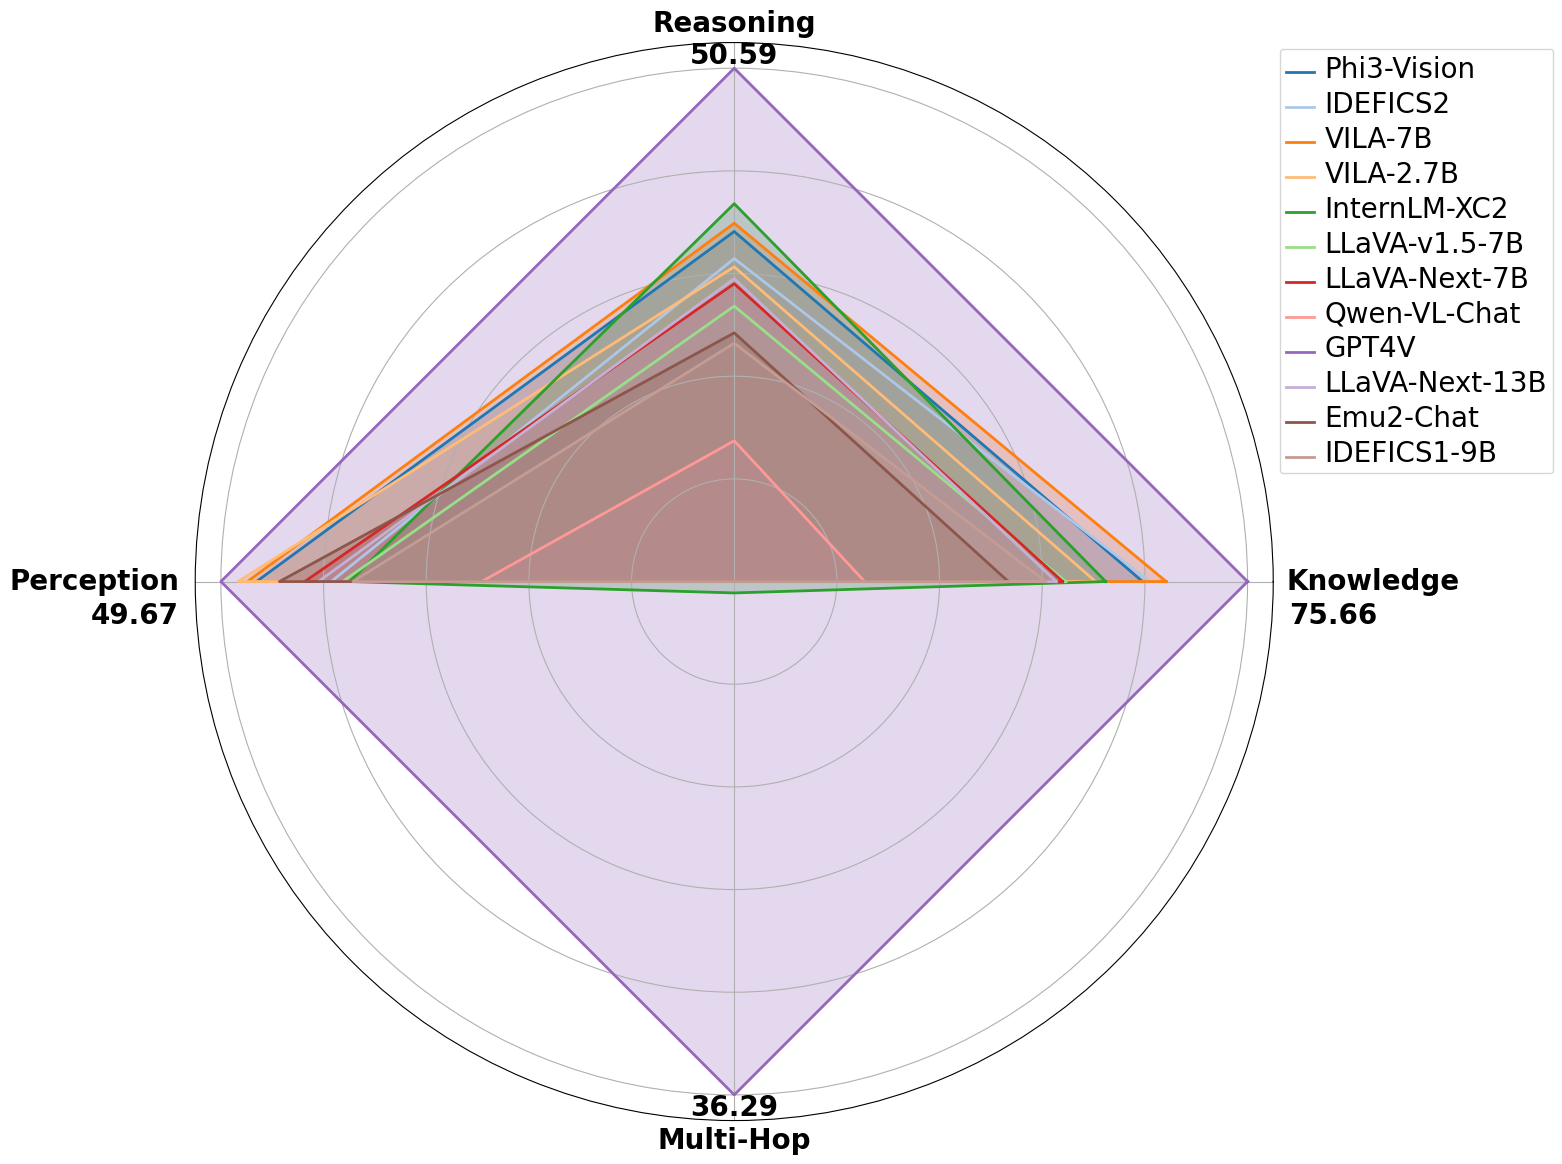

In [47]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open("results.json", "r") as f:
    data_dict = json.load(f)

# Define the groupings
groups = {
    "Knowledge": ["foods", "places"],
    "Reasoning": ["codeu", "plot", "analogy", "3d_scene"],
    "Perception": ["image_jigsaw", "count", "domain"],
    "Multi-Hop": ["image_needles", "arxiv"]
}

def compute_averages(model_data, groups):
    averages = {}
    for group, features in groups.items():
        values = [model_data[feature] for feature in features]
        averages[group] = np.mean(values)
    return averages

# Compute the averages for each model
averages_dict = {model: compute_averages(data, groups) for model, data in data_dict.items()}

# Find the maximum values for each dimension
max_values = {dimension: max([averages[dimension] for averages in averages_dict.values()]) for dimension in groups.keys()}

# Normalize the averages
normalized_averages_dict = {}
for model, averages in averages_dict.items():
    normalized_averages_dict[model] = {dimension: value / max_values[dimension] for dimension, value in averages.items()}

# Extract data for plotting
labels = list(groups.keys())
num_vars = len(labels)

# Repeat the first value to close the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
colors = sns.color_palette("tab20", len(normalized_averages_dict))
# Plot each model
for color, (model, averages) in zip(colors, normalized_averages_dict.items()):
    values = list(averages.values())
    values += values[:1]
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2, label=model)

# Mark the maximum original values
for dimension, max_value in max_values.items():
    idx = labels.index(dimension)
    angle = angles[idx]
    if angle == 0:
        ax.text(angle-0.07, 1.17, f'{max_value:.2f}', horizontalalignment='center', size=20, color='black', weight='semibold')
    elif angle == np.pi:
        ax.text(angle+0.07, 1.17, f'{max_value:.2f}', horizontalalignment='center', size=20, color='black', weight='semibold')
    elif 0 < angle < np.pi:
        ax.text(angle, 1.01, f'{max_value:.2f}', horizontalalignment='center', size=20, color='black', weight='semibold')
    else:
        ax.text(angle, 1.04, f'{max_value:.2f}', horizontalalignment='center', size=20, color='black', weight='semibold')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
        x_lab_pos, y_lab_pos = label.get_position()
        label.set_position([x_lab_pos, y_lab_pos-0.15])
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('center')
    else:
        label.set_horizontalalignment('center')
    label.set_fontsize(20)
    label.set_weight('semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
# set legend font size
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.savefig("radar.pdf", bbox_inches='tight', dpi=400)

In [80]:
x_lab_pos

3.141592653589793

In [48]:
for model, scores in averages_dict.items():
    formatted_scores = [f"{score:.2f}" for score in scores.values()]
    average_score = sum(scores.values()) / len(scores)
    print(f"{model} & {' & '.join(formatted_scores)} & {average_score:.2f} \\\\")


Phi3-Vision & 60.19 & 34.49 & 46.22 & 0.00 & 35.23 \\
IDEFICS2 & 61.26 & 31.83 & 39.00 & 0.00 & 33.02 \\
VILA-7B & 63.66 & 35.31 & 47.11 & 0.00 & 36.52 \\
VILA-2.7B & 53.27 & 31.01 & 48.00 & 0.00 & 33.07 \\
InternLM-XC2 & 54.74 & 37.23 & 37.22 & 0.81 & 32.50 \\
LLaVA-v1.5-7B & 48.86 & 27.14 & 37.89 & 0.00 & 28.47 \\
LLaVA-Next-7B & 48.40 & 29.35 & 41.56 & 0.00 & 29.83 \\
Qwen-VL-Chat & 19.23 & 13.87 & 24.44 & 0.00 & 14.38 \\
GPT4V & 75.66 & 50.59 & 49.67 & 36.29 & 53.05 \\
LLaVA-Next-13B & 47.44 & 29.85 & 40.22 & 0.00 & 29.38 \\
Emu2-Chat & 40.40 & 24.51 & 44.00 & 0.00 & 27.23 \\
IDEFICS1-9B & 45.89 & 23.49 & 36.89 & 0.00 & 26.57 \\


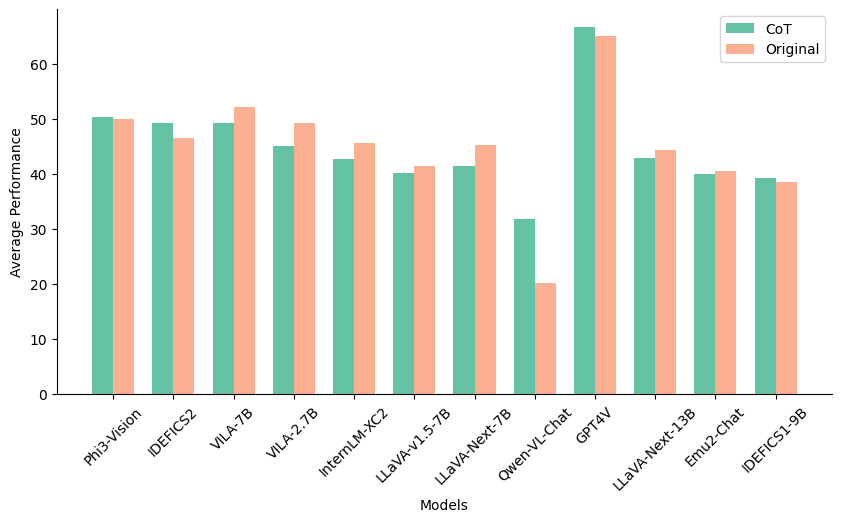

In [49]:
data1 = data_dict
with open("results_CoT.json", "r") as f:
    data2 = json.load(f)

tasks = list(next(iter(data2.values())).keys())

# Compute average performance for each model in both JSONs
def compute_average_performance(model_data, tasks):
    values = [model_data[task] for task in tasks]
    return np.mean(values)

average_performance1 = {model: compute_average_performance(data, tasks) for model, data in data1.items()}
average_performance2 = {model: compute_average_performance(data, tasks) for model, data in data2.items()}

# Prepare data for plotting
models = list(average_performance1.keys())
performance1 = [average_performance1[model] for model in models]
performance2 = [average_performance2[model] for model in models]

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bars
# use tab10 palette for colors
color1 = sns.color_palette("Set2")[0]
color2 = sns.color_palette("Set2")[1]
ax.bar(index, performance2, bar_width, label='CoT', color=color1)
ax.bar(index + bar_width, performance1, bar_width, label='Original', color=color2, alpha=0.7)
ax.spines[['right', 'top']].set_visible(False)
# Set the labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Average Performance')
#ax.set_title('Average Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Show the plot
plt.savefig("CoT.pdf", bbox_inches='tight',)

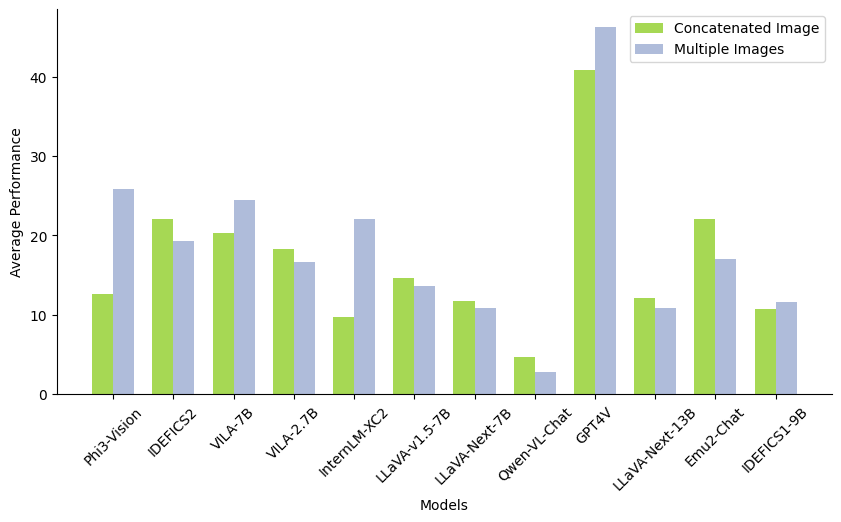

In [50]:
data1 = data_dict
with open("results_concat.json", "r") as f:
    data2 = json.load(f)

tasks = list(next(iter(data2.values())).keys())
tasks_strip = [task.split("_concat")[0] for task in tasks]

# Compute average performance for each model in both JSONs
def compute_average_performance(model_data, tasks):
    #tasks_strip = [task.split("_concat")[0] for task in tasks]
    values = [model_data[task] for task in tasks]
    return np.mean(values)

average_performance1 = {model: compute_average_performance(data, tasks_strip) for model, data in data1.items()}
average_performance2 = {model: compute_average_performance(data, tasks) for model, data in data2.items()}

# Prepare data for plotting
models = list(average_performance1.keys())
performance1 = [average_performance1[model] for model in models]
performance2 = [average_performance2[model] for model in models]

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bars
# use tab10 palette for colors
color1 = sns.color_palette("Set2")[4]
color2 = sns.color_palette("Set2")[2]
ax.bar(index, performance2, bar_width, label='Concatenated Image', color=color1)
ax.bar(index + bar_width, performance1, bar_width, label='Multiple Images', color=color2, alpha=0.7)
ax.spines[['right', 'top']].set_visible(False)
# Set the labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Average Performance')
#ax.set_title('Average Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Show the plot
plt.savefig("concat_vs_multiple.pdf", bbox_inches='tight',)

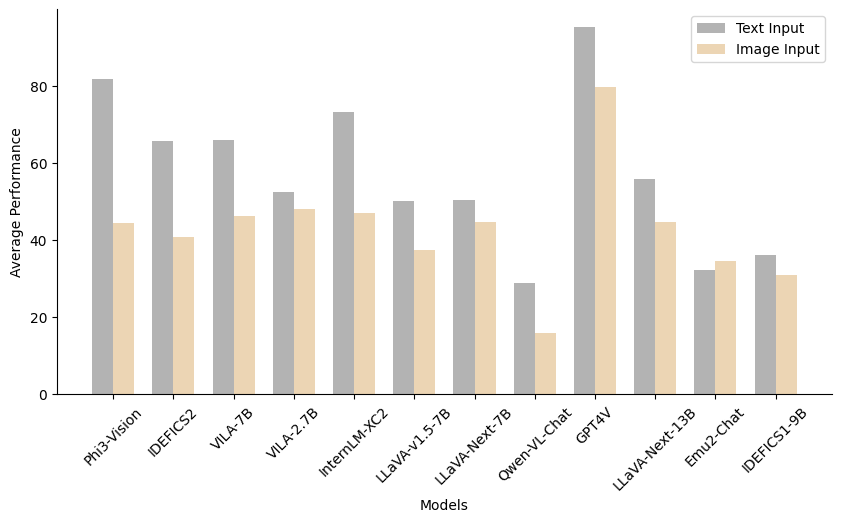

In [56]:
data1 = data_dict
with open("results_text.json", "r") as f:
    data2 = json.load(f)

tasks = list(next(iter(data2.values())).keys())
tasks_strip = [task.split("_text")[0] for task in tasks]

# Compute average performance for each model in both JSONs
def compute_average_performance(model_data, tasks):
    #tasks_strip = [task.split("_concat")[0] for task in tasks]
    values = [model_data[task] for task in tasks]
    return np.mean(values)

average_performance1 = {model: compute_average_performance(data, tasks_strip) for model, data in data1.items()}
average_performance2 = {model: compute_average_performance(data, tasks) for model, data in data2.items()}

# Prepare data for plotting
models = list(average_performance1.keys())
performance1 = [average_performance1[model] for model in models]
performance2 = [average_performance2[model] for model in models]

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bars
# use tab10 palette for colors
color1 = sns.color_palette("Set2")[7]
color2 = sns.color_palette("Set2")[6]
ax.bar(index, performance2, bar_width, label='Text Input', color=color1)
ax.bar(index + bar_width, performance1, bar_width, label='Image Input', color=color2, alpha=0.7)
ax.spines[['right', 'top']].set_visible(False)
# Set the labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Average Performance')
#ax.set_title('Average Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Show the plot
plt.savefig("text_vs_image.pdf", bbox_inches='tight',)

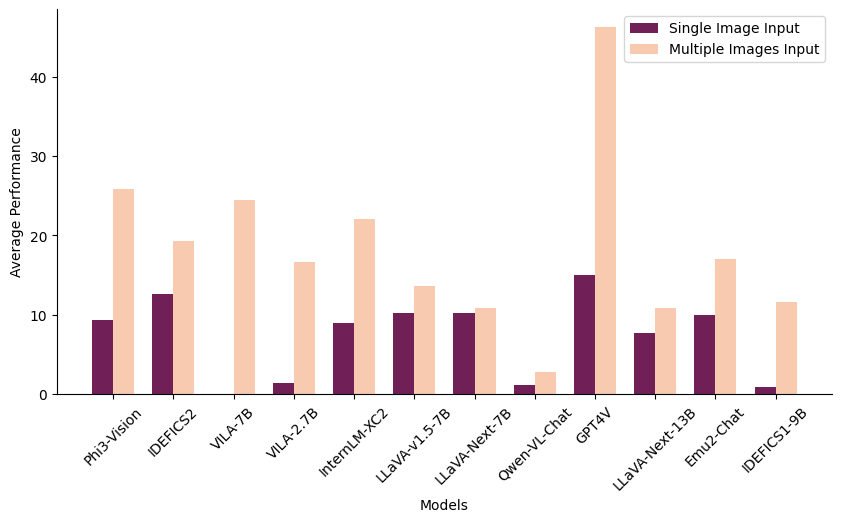

In [66]:
data1 = data_dict
with open("results_single.json", "r") as f:
    data2 = json.load(f)

tasks = list(next(iter(data2.values())).keys())
tasks_strip = [task.split("_text")[0] for task in tasks]

# Compute average performance for each model in both JSONs
def compute_average_performance(model_data, tasks):
    #tasks_strip = [task.split("_concat")[0] for task in tasks]
    values = [model_data[task] for task in tasks]
    return np.mean(values)

average_performance1 = {model: compute_average_performance(data, tasks_strip) for model, data in data1.items()}
average_performance2 = {model: compute_average_performance(data, tasks) for model, data in data2.items()}

# Prepare data for plotting
models = list(average_performance1.keys())
performance1 = [average_performance1[model] for model in models]
performance2 = [average_performance2[model] for model in models]

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bars
# use tab10 palette for colors
color1 = sns.color_palette("rocket")[1]
color2 = sns.color_palette("rocket")[5]
ax.bar(index, performance2, bar_width, label='Single Image Input', color=color1)
ax.bar(index + bar_width, performance1, bar_width, label='Multiple Images Input', color=color2, alpha=0.7)
ax.spines[['right', 'top']].set_visible(False)
# Set the labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Average Performance')
#ax.set_title('Average Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Show the plot
plt.savefig("single_vs_multi.pdf", bbox_inches='tight',)